In [9]:
# Importing relevant libraries
from Kanha_func import *

In [2]:
df_full = pd.read_csv('Full_Dataset.csv')
df_toilets = pd.read_csv('public_restrooms_sf.csv')
df_complete = pd.read_csv('Complete_Geocoded_Homeless_Police_Reports.csv')

### Histogram of Instances of Homeless Presence along with locations of Public Restrooms

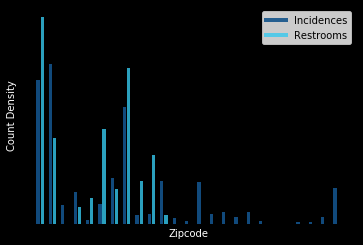

In [10]:
plothist_rest(df_full, df_toilets, False)

### Plot of Colorbar

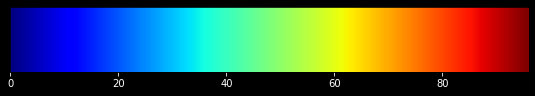

In [11]:
create_colorbar(df_toilets, False)